# Unet variations comparison

In [1]:
import pandas as pd
import numpy as np
from tabulate import tabulate
from matplot2tikz import save

## Load data

In [2]:
df = pd.read_csv("analysis/results.csv")
per_class_pa_df = pd.read_csv("analysis/PerClassPA.csv")
per_class_iou_df = pd.read_csv("analysis/PerClassIoU.csv")

### Class imbalance

In [ ]:
from src.data_loader import (
    SegmentationDataModule,
    SegmentationValTransform,
)

# Get the training and validation datasets
datamodule = SegmentationDataModule(
    batch_size=24,
    data_path="data",
    num_classes=20,
    train_transform=SegmentationValTransform(image_size=(224, 224)),
    val_transform=SegmentationValTransform(image_size=(224, 224)),
    test_transform=SegmentationValTransform(image_size=(224, 224)),
    num_workers=9,
)
datamodule.setup()

In [89]:
dataloader = datamodule.val_dataloader()

## Mean and std

In [54]:
mean, std = datamodule.compute_mean_std()
print(f"Mean {mean}")
print(f"Std {std}")

Computing mean/std: 100%|██████████| 438/438 [01:28<00:00,  4.96it/s]

Mean [0.37019267678260803, 0.41442954540252686, 0.42439478635787964]
Std [0.244317427277565, 0.2607012987136841, 0.2778654992580414]


In [178]:
LABEL_MAP = {
    0: "road",
    1: "sidewalk",
    2: "building",
    3: "wall",
    4: "fence",
    5: "pole",
    6: "traffic light",
    7: "traffic sign",
    8: "vegetation",
    9: "terrain",
    10: "sky",
    11: "person",
    12: "rider",
    13: "car",
    14: "truck",
    15: "bus",
    16: "train",
    17: "motorcycle",
    18: "bicycle",
    19: "unknown",
}

COLOR_MAP = {
    (128, 64, 128): 0,  # road
    (244, 35, 232): 1,  # sidewalk
    (70, 70, 70): 2,  # building
    (102, 102, 156): 3,  # wall
    (190, 153, 153): 4,  # fence
    (153, 153, 153): 5,  # pole
    (250, 170, 30): 6,  # traffic light
    (220, 220, 0): 7,  # traffic sign
    (107, 142, 35): 8,  # vegetation
    (152, 251, 152): 9,  # terrain
    (70, 130, 180): 10,  # sky
    (220, 20, 60): 11,  # person
    (255, 0, 0): 12,  # rider
    (0, 0, 142): 13,  # car
    (0, 0, 70): 14,  # truck
    (0, 60, 100): 15,  # bus
    (0, 80, 100): 16,  # train
    (0, 0, 230): 17,  # motorcycle
    (119, 11, 32): 18,  # bicycle
    (0, 0, 0): 19,  # unknown / background
}

In [6]:
counts = datamodule.get_class_counts()
counts

Computing class frequencies: 100%|██████████| 7000/7000 [03:12<00:00, 36.28it/s]


tensor([7.5488e+07, 7.1458e+06, 4.6570e+07, 1.6813e+06, 3.6202e+06, 3.2463e+06,
        6.3206e+05, 1.1922e+06, 4.6388e+07, 3.6200e+06, 6.0770e+07, 8.8162e+05,
        7.2470e+04, 2.8500e+07, 3.4107e+06, 1.9532e+06, 4.8281e+04, 8.4583e+04,
        1.8026e+05, 6.5747e+07])

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

counts = counts.cpu().numpy()

class_names = [LABEL_MAP[i] for i in range(len(LABEL_MAP))]

# Sort for better visuals (optional)
sorted_idx = np.argsort(-counts)
sorted_names = [class_names[i] for i in sorted_idx]
sorted_counts = counts[sorted_idx]

# Invert the color map: class index → RGB
IDX_TO_COLOR = {
    v: np.array(k) / 255.0 for k, v in COLOR_MAP.items()
}  # Normalize to [0,1] for matplotlib

#### Bar plot

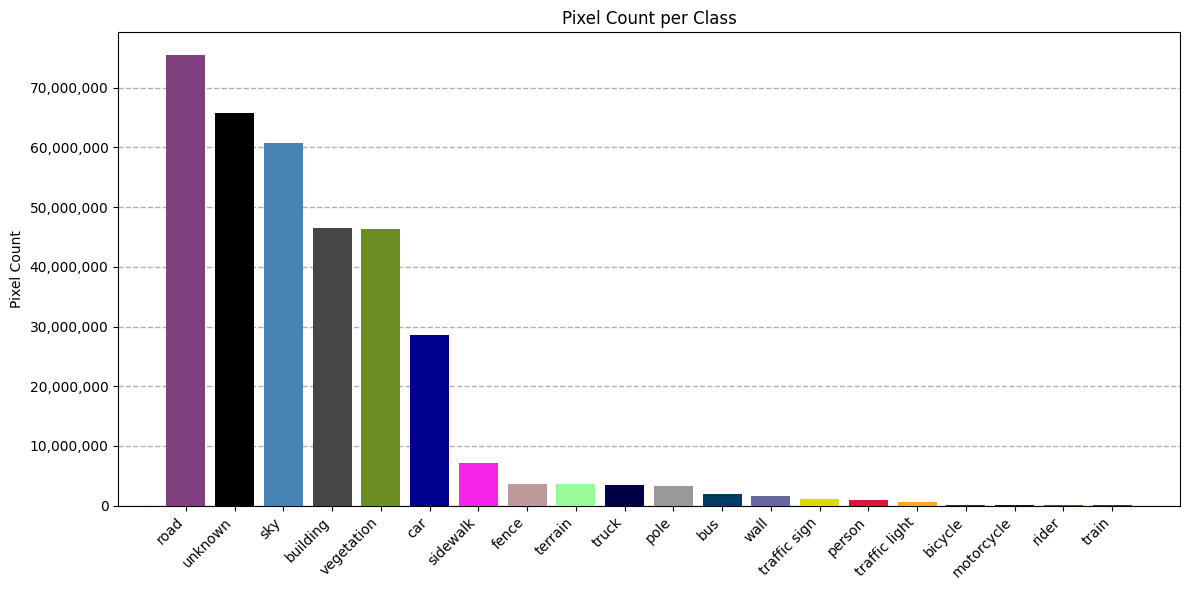

In [ ]:
# Get colors in sorted order
bar_colors = [IDX_TO_COLOR[i] for i in sorted_idx]

import matplotlib.ticker as ticker

plt.figure(figsize=(12, 6))
plt.bar(sorted_names, sorted_counts, color=bar_colors, zorder=3)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Pixel Count")
plt.title("Pixel Count per Class")

# Force plain formatting
ax = plt.gca()
ax.ticklabel_format(axis="y", style="plain")  # 👈 disables scientific notation
ax.yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, _: f"{int(x):,}")
)  # Adds commas

plt.tight_layout()
plt.grid(True, which="major", axis="y", linestyle="--", linewidth=1, zorder=0)
save("tikz.tex")
plt.show()

## Results

### Transform

In [3]:
runs = {
    "unet_original_def_sufl_1": "CNN U-Net",
    "swin_unet_def_sufl_1": "Swin U-Net",
    "mamba_unet_def_sufl_1": "Mamba U-Net",
    "hmt_unet_def_sufl_1": "HMT U-Net",
    "unet_original_def_sufl_2": "CNN U-Net",
    "swin_unet_def_sufl_2": "Swin U-Net",
    "mamba_unet_def_sufl_2": "Mamba U-Net",
    "hmt_unet_def_sufl_2": "HMT U-Net",
    "unet_original_def_sufl_3": "CNN U-Net",
    "swin_unet_def_sufl_3": "Swin U-Net",
    "mamba_unet_def_sufl_3": "Mamba U-Net",
    "hmt_unet_def_sufl_3": "HMT U-Net",
    "unet_original_def_sufl_4": "CNN U-Net",
    "swin_unet_def_sufl_4": "Swin U-Net",
    "mamba_unet_def_sufl_4": "Mamba U-Net",
    "hmt_unet_def_sufl_4": "HMT U-Net",
}

runs_number = {
    "unet_original_def_sufl_1": 1,
    "swin_unet_def_sufl_1": 1,
    "mamba_unet_def_sufl_1": 1,
    "hmt_unet_def_sufl_1": 1,
    "unet_original_def_sufl_2": 2,
    "swin_unet_def_sufl_2": 2,
    "mamba_unet_def_sufl_2": 2,
    "hmt_unet_def_sufl_2": 2,
    "unet_original_def_sufl_3": 3,
    "swin_unet_def_sufl_3": 3,
    "mamba_unet_def_sufl_3": 3,
    "hmt_unet_def_sufl_3": 3,
    "unet_original_def_sufl_4": 4,
    "swin_unet_def_sufl_4": 4,
    "mamba_unet_def_sufl_4": 4,
    "hmt_unet_def_sufl_4": 4,
}

class_names = {
    "Class 0": "road",
    "Class 1": "sidewalk",
    "Class 2": "building",
    "Class 3": "wall",
    "Class 4": "fence",
    "Class 5": "pole",
    "Class 6": "traffic light",
    "Class 7": "traffic sign",
    "Class 8": "vegetation",
    "Class 9": "terrain",
    "Class 10": "sky",
    "Class 11": "person",
    "Class 12": "rider",
    "Class 13": "car",
    "Class 14": "truck",
    "Class 15": "bus",
    "Class 16": "train",
    "Class 17": "motorcycle",
    "Class 18": "bicycle",
    "Class 19": "unknown",
}


In [4]:
ordered_classes = [
    "road",
    "unknown",
    "sky",
    "building",
    "vegetation",
    "car",
    "sidewalk",
    "fence",
    "terrain",
    "truck",
    "pole",
    "bus",
    "wall",
    "traffic sign",
    "person",
    "traffic light",
    "bicycle",
    "motorcycle",
    "rider",
    "train",
]

In [5]:
df["Run"] = df["Model"].map(runs_number)
df["Model"] = df["Model"].map(runs)

per_class_pa_df["Run"] = per_class_pa_df["Model"].map(runs_number)
per_class_pa_df["Model"] = per_class_pa_df["Model"].map(runs)
per_class_pa_df["Class"] = per_class_pa_df["Class"].map(class_names)
per_class_pa_df['Class'] = pd.Categorical(per_class_pa_df['Class'], categories=ordered_classes, ordered=True)

per_class_iou_df["Run"] = per_class_iou_df["Model"].map(runs_number)
per_class_iou_df["Model"] = per_class_iou_df["Model"].map(runs)
per_class_iou_df["Class"] = per_class_iou_df["Class"].map(class_names)
per_class_iou_df['Class'] = pd.Categorical(per_class_iou_df['Class'], categories=ordered_classes, ordered=True)


### Tables

In [6]:
per_class_pa_df = per_class_pa_df.groupby(["Model", "Class"]).mean(numeric_only=True).reset_index()
per_class_iou_df = per_class_iou_df.groupby(["Model", "Class"]).mean(numeric_only=True).reset_index()

/var/folders/_2/d0jdk4lx3hl2vhm1490_4rm40000gn/T/ipykernel_2873/4214063508.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  per_class_pa_df = per_class_pa_df.groupby(["Model", "Class"]).mean(numeric_only=True).reset_index()
/var/folders/_2/d0jdk4lx3hl2vhm1490_4rm40000gn/T/ipykernel_2873/4214063508.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  per_class_iou_df = per_class_iou_df.groupby(["Model", "Class"]).mean(numeric_only=True).reset_index()


In [40]:
no_epoch_df = df.drop(columns=["epoch"])

rq1_df = (
    no_epoch_df.drop(columns=["FPS", "Loss", "State", "Created", "Runtime", "Run"])
    .groupby(by="Model")
    .mean(numeric_only=True)
    .reset_index()
)

rq1_std_df = (
    no_epoch_df.drop(columns=["FPS", "Loss", "State", "Created", "Runtime", "Run"])
    .groupby(by="Model")
    .std(numeric_only=True)
    .reset_index()
)

rq2_df = (
    no_epoch_df.drop(
        columns=["PA", "mPA", "mIoU", "Loss", "State", "Created", "Runtime", "Run"]
    )
    .groupby(by="Model")
    .mean(numeric_only=True)
    .reset_index()
)

rq2_std_df = (
    no_epoch_df.drop(
        columns=["PA", "mPA", "mIoU", "Loss", "State", "Created", "Runtime", "Run"]
    )
    .groupby(by="Model")
    .std(numeric_only=True)
    .reset_index()
)

In [41]:
def highlight_max(s):
    is_max = s == s.max()
    return ["font-weight: bold" if v else "" for v in is_max]

def highlight_min(s):
    is_min = s == s.min()
    return ["font-weight: bold" if v else "" for v in is_min]

# Apply styling
rq1_styled_df = rq1_df.style.apply(highlight_max, subset=["PA", "mIoU", "mPA"])
rq1_std_styled_df = rq1_std_df.style.apply(highlight_min, subset=["PA", "mIoU", "mPA"])

rq1_styled_df

,Model,PA,mIoU,mPA
0,CNN U-Net,0.854342,0.382608,0.488213
1,HMT U-Net,0.857018,0.382697,0.495008
2,Mamba U-Net,0.862570,0.397096,0.510041
3,Swin U-Net,0.836003,0.338410,0.436073


In [42]:
rq1_std_styled_df

,Model,PA,mIoU,mPA
0,CNN U-Net,0.001635,0.004337,0.008453
1,HMT U-Net,0.000969,0.000848,0.001401
2,Mamba U-Net,0.001041,0.004027,0.004119
3,Swin U-Net,0.005270,0.011155,0.017040


In [43]:
rq2_styled_df = rq2_df.style.apply(highlight_max, subset=["FPS"])
rq2_std_styled_df = rq2_std_df.style.apply(highlight_min, subset=["FPS"])

rq2_styled_df

,Model,FPS
0,CNN U-Net,146.731097
1,HMT U-Net,41.692847
2,Mamba U-Net,79.677725
3,Swin U-Net,76.860429


In [44]:
rq2_std_styled_df

,Model,FPS
0,CNN U-Net,0.262139
1,HMT U-Net,3.459845
2,Mamba U-Net,10.273591
3,Swin U-Net,9.504188


In [45]:
rq1_df.to_latex(
    "table.tex",
    label="tab:rq1",
    caption="RQ1: Performance of the models in terms of pixel accuracy (PA), mean pixel accuracy (mPA), and mean Intersection over Union (mIoU).",
    position="ht",
    column_format="lcccccc",
    index=False,
)

rq1_std_df.to_latex(
    "table_std.tex",
    label="tab:rq1_std",
    caption="RQ1: Standard deviation of the models in terms of pixel accuracy (PA), mean pixel accuracy (mPA), and mean Intersection over Union (mIoU).",
    position="ht",
    column_format="lcccccc",
    index=False,
)

In [46]:
rq2_df.to_latex(
    "table2.tex",
    label="tab:rq2",
    caption="RQ2: Performance of the models in terms of frames per second",
    position="ht",
    column_format="lcccccc",
    index=False,
)
rq2_std_df.to_latex(
    "table2_std.tex",
    label="tab:rq2_std",
    caption="RQ2: Standard deviation of the models in terms of frames per second",
    position="ht",
    column_format="lcccccc",
    index=False,
)

In [72]:
print(tabulate(df.groupby("Model").mean(numeric_only=True).reset_index().drop(columns=["Runtime", "epoch", "Run", "Loss"]), headers="keys", tablefmt="github"))

|    | Model       |       PA |      FPS |     mIoU |      mPA |
|----|-------------|----------|----------|----------|----------|
|  0 | CNN U-Net   | 0.854342 | 146.731  | 0.382608 | 0.488213 |
|  1 | HMT U-Net   | 0.857018 |  41.6928 | 0.382697 | 0.495008 |
|  2 | Mamba U-Net | 0.86257  |  79.6777 | 0.397096 | 0.510041 |
|  3 | Swin U-Net  | 0.836003 |  76.8604 | 0.33841  | 0.436073 |


### Plots

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt


def plot_bar_with_labels(df, x, y, palette, title=None, ylabel=None, ytop=1):
    """
    Creates a Seaborn bar plot with value labels on top.
    Allows a dictionary palette for custom category-color mapping.
    """
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(8, 5))

    # Create bar plot using a categorical color map (dict)
    # Set hue to x and disable legend to apply the color map correctly
    barplot = sns.barplot(
        data=df,
        x=x,
        y=y,
        hue=x,  # this tells seaborn to use 'x' to color the bars
        palette=palette,  # dict or list of colors
        legend=False,  # no need to show repeated legend
        edgecolor=None,  # optional: adds a border to the bars
    )

    # Add value labels
    for p in barplot.patches:
        height = p.get_height()
        barplot.text(
            x=p.get_x() + p.get_width() / 2,
            y=height + 0.01,
            s=f"{height:.4f}",
            ha="center",
        )

    # Titles and labels
    if title:
        plt.title(title, fontsize=14)
    plt.xlabel(x)
    plt.ylabel(ylabel if ylabel else y)
    plt.ylim(0, ytop)
    plt.xticks(rotation=20)
    # plt.tight_layout()
    plt.show()

def plot_spider_chart(df, metric_col='PA', title='Per-Class Pixel Accuracy (PA) by Model', palette=None):
    """
    Plot a spider (radar) chart comparing per-class metric (e.g., PA) across models.

    Parameters:
    - df: DataFrame with columns ['Model', 'Class', metric_col]
    - metric_col: The column to visualize (default = 'PA')
    - title: Title of the chart
    - palette: Dict or list of colors. If dict, keys must match model names.
    """
    # Pivot data: models as rows, classes as columns
    radar_data = df.pivot_table(index='Model', columns='Class', values=metric_col)

    # Get categories and angles
    categories = radar_data.columns.tolist()
    N = len(categories)
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
    angles += angles[:1]  # close loop

    # Setup plot
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    # Loop through models and plot
    for i, (model, row) in enumerate(radar_data.iterrows()):
        values = row.tolist() + row.tolist()[:1]

        # Choose color from palette
        if palette:
            if isinstance(palette, dict):
                color = palette.get(model, None)
            else:
                color = palette[i % len(palette)]
        else:
            color = None

        ax.plot(angles, values, label=model, linewidth=2, color=color)
        ax.fill(angles, values, alpha=0.1, color=color)

    # Set category labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=10)

    # Set radial ticks (y-axis)
    yticks = np.arange(0.2, 1.01, 0.2)
    ax.set_yticks(yticks)
    ax.set_yticklabels([f"{tick:.1f}" for tick in yticks], fontsize=9)
    ax.set_ylim(0, 1)

    # Optional title and legend
    #ax.set_title(title, fontsize=14, pad=20)
    ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))

    plt.tight_layout()
    plt.show()

In [49]:
color_map = {
    "CNN U-Net": "#ff9f9b",
    "Swin U-Net": "#a1c9f4",
    "Mamba U-Net": "#8de5a1",
    "HMT U-Net": "#debb9b",
}

### RQ1

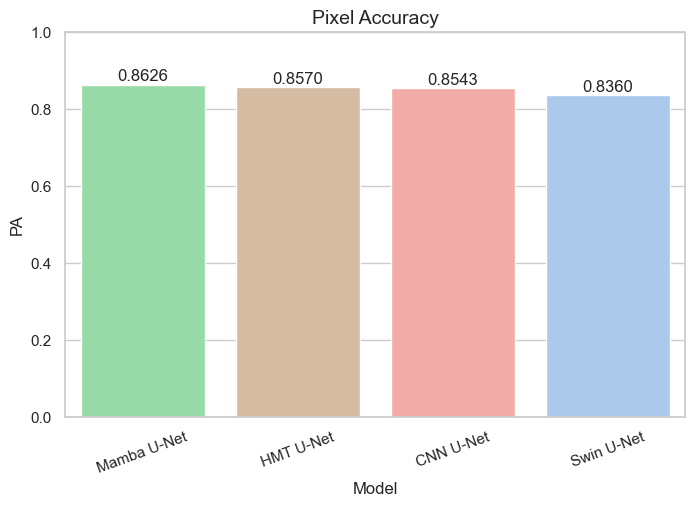

In [50]:
df_sorted = rq1_df.sort_values(by="PA", ascending=False)

plot_bar_with_labels(
    df_sorted, x="Model", y="PA", palette=color_map, title="Pixel Accuracy", ylabel="PA"
)

/var/folders/_2/d0jdk4lx3hl2vhm1490_4rm40000gn/T/ipykernel_2873/1517701373.py:56: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  radar_data = df.pivot_table(index='Model', columns='Class', values=metric_col)


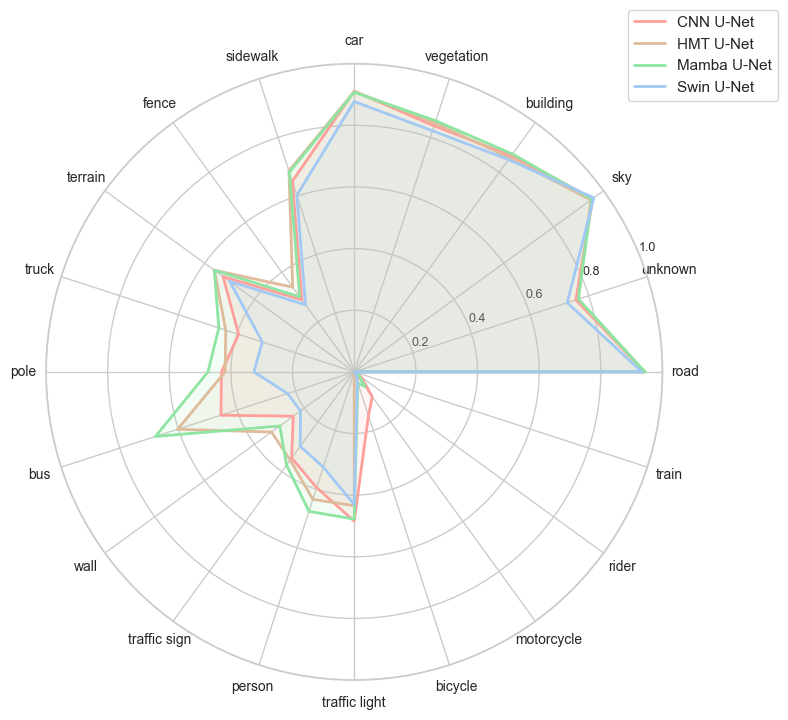

In [51]:
plot_spider_chart(
    per_class_pa_df,
    metric_col="PA",
    title="Per-Class Pixel Accuracy",
    palette=color_map,
)

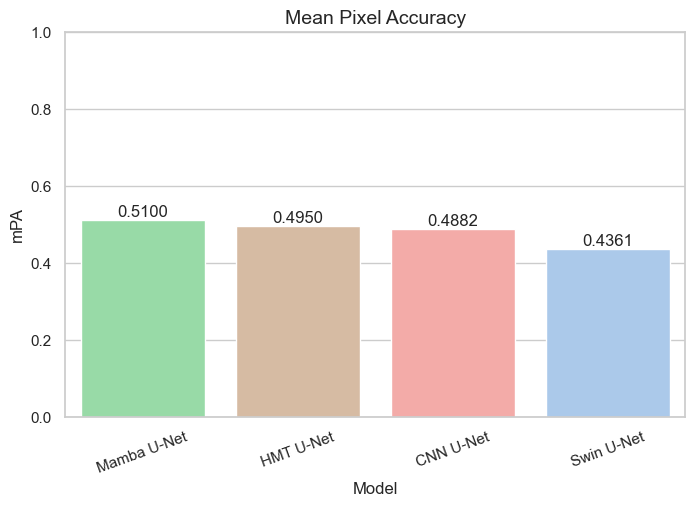

In [52]:
df_sorted = rq1_df.sort_values(by="mPA", ascending=False)

plot_bar_with_labels(
    df_sorted,
    x="Model",
    y="mPA",
    palette=color_map,
    title="Mean Pixel Accuracy",
    ylabel="mPA",
)

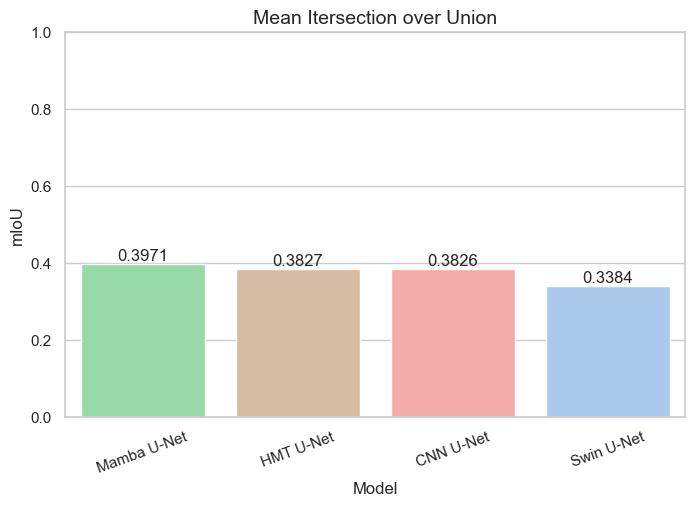

In [53]:
df_sorted = rq1_df.sort_values(by="mIoU", ascending=False)

plot_bar_with_labels(
    df_sorted,
    x="Model",
    y="mIoU",
    palette=color_map,
    title="Mean Itersection over Union",
    ylabel="mIoU",
)

/var/folders/_2/d0jdk4lx3hl2vhm1490_4rm40000gn/T/ipykernel_2873/1517701373.py:56: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  radar_data = df.pivot_table(index='Model', columns='Class', values=metric_col)


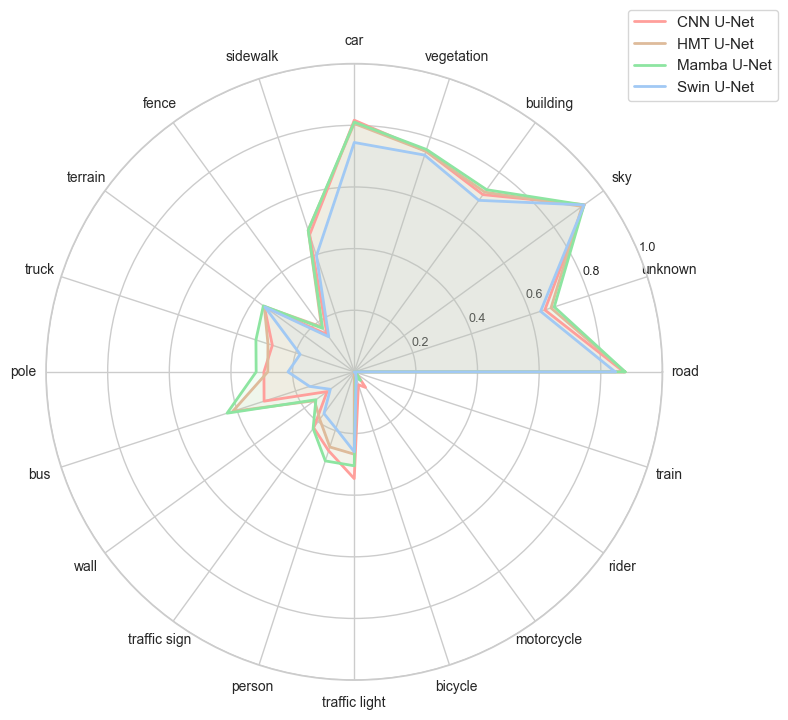

In [54]:
plot_spider_chart(
    per_class_iou_df,
    metric_col="IoU",
    title="Per-Class Intersection over Union (IoU)",
    palette=color_map,
)

### RQ2

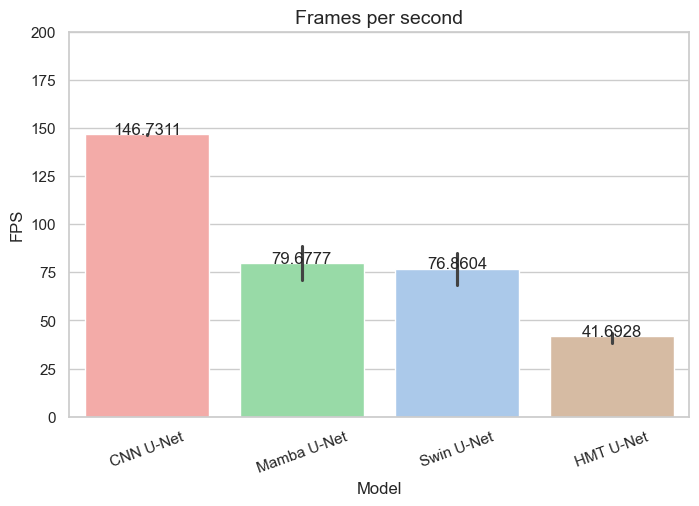

In [55]:
df_sorted = df.sort_values(by="FPS", ascending=False)

plot_bar_with_labels(
    df_sorted,
    x="Model",
    y="FPS",
    palette=color_map,
    title="Frames per second",
    ylabel="FPS",
    ytop=200,
)

## Statistical tests

In [56]:
def normality_test(df, column):
    from scipy.stats import shapiro

    models = df["Model"].unique()
    for model in models:
        group = df[df["Model"] == model][column]
        stat, p = shapiro(group)
        if p > 0.05:
            print(f"{model}: Normality assumed: Statistic={stat:.4f}, p-value={p:.4f}")
        else:
            print(f"{model}: Normality not assumed: Statistic={stat:.4f}, p-value={p:.4f}")

def variance_test(df, column):
    from scipy.stats import levene

    models = df["Model"].unique()
    groups = [df[df["Model"] == model][column] for model in models]
    stat, p = levene(*groups)
    if p > 0.05:
        print(f"Equal variance assumed: Statistic={stat:.4f}, p-value={p:.4f}")
    else:
        print(f"Equal variance not assumed: Statistic={stat:.4f}, p-value={p:.4f}")

def anova_test(df, column):
    from scipy.stats import f_oneway

    models = df["Model"].unique()
    groups = [df[df["Model"] == model][column] for model in models]
    stat, p = f_oneway(*groups)
    if p < 0.05:
        print(f"ANOVA test significant: Statistic={stat:.4f}, p-value={p:.4f}")
    else:
        print(f"ANOVA test not significant: Statistic={stat:.4f}, p-value={p:.4f}")

def tukey_test(df, column):
    from statsmodels.stats.multicomp import pairwise_tukeyhsd

    print(f"\nTukey HSD pairwise comparison for {column}:")
    tukey = pairwise_tukeyhsd(endog=df[column], groups=df["Model"], alpha=0.05)
    print(tukey)

### PA

In [57]:
normality_test(df, "PA")

Mamba U-Net: Normality assumed: Statistic=0.7921, p-value=0.0888
HMT U-Net: Normality assumed: Statistic=0.9227, p-value=0.5524
Swin U-Net: Normality assumed: Statistic=0.9308, p-value=0.5991
CNN U-Net: Normality not assumed: Statistic=0.7413, p-value=0.0319


In [58]:
variance_test(df, "PA")

Equal variance assumed: Statistic=1.3798, p-value=0.2962


In [59]:
anova_test(df, "PA")

ANOVA test significant: Statistic=65.2738, p-value=0.0000


In [60]:
tukey_test(df, "PA")


Tukey HSD pairwise comparison for PA:
     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1      group2   meandiff p-adj   lower   upper  reject
--------------------------------------------------------------
  CNN U-Net   HMT U-Net   0.0027 0.5637 -0.0033  0.0087  False
  CNN U-Net Mamba U-Net   0.0082 0.0071  0.0022  0.0142   True
  CNN U-Net  Swin U-Net  -0.0183    0.0 -0.0243 -0.0124   True
  HMT U-Net Mamba U-Net   0.0056  0.072 -0.0004  0.0115  False
  HMT U-Net  Swin U-Net   -0.021    0.0  -0.027  -0.015   True
Mamba U-Net  Swin U-Net  -0.0266    0.0 -0.0325 -0.0206   True
--------------------------------------------------------------


### mPA

In [61]:
normality_test(df, "mPA")

Mamba U-Net: Normality assumed: Statistic=0.8617, p-value=0.2665
HMT U-Net: Normality assumed: Statistic=0.8880, p-value=0.3739
Swin U-Net: Normality assumed: Statistic=0.9761, p-value=0.8789
CNN U-Net: Normality assumed: Statistic=0.9578, p-value=0.7648


In [62]:
variance_test(df, "mPA")

Equal variance assumed: Statistic=2.0108, p-value=0.1662


In [63]:
anova_test(df, "mPA")

ANOVA test significant: Statistic=43.4660, p-value=0.0000


In [64]:
tukey_test(df, "mPA")


Tukey HSD pairwise comparison for mPA:
     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1      group2   meandiff p-adj   lower   upper  reject
--------------------------------------------------------------
  CNN U-Net   HMT U-Net   0.0068 0.7605 -0.0137  0.0273  False
  CNN U-Net Mamba U-Net   0.0218 0.0356  0.0013  0.0423   True
  CNN U-Net  Swin U-Net  -0.0521    0.0 -0.0726 -0.0317   True
  HMT U-Net Mamba U-Net    0.015 0.1843 -0.0054  0.0355  False
  HMT U-Net  Swin U-Net  -0.0589    0.0 -0.0794 -0.0385   True
Mamba U-Net  Swin U-Net   -0.074    0.0 -0.0944 -0.0535   True
--------------------------------------------------------------


### mIoU

In [65]:
normality_test(df, "mIoU")

Mamba U-Net: Normality assumed: Statistic=0.8507, p-value=0.2285
HMT U-Net: Normality assumed: Statistic=0.7656, p-value=0.0535
Swin U-Net: Normality assumed: Statistic=0.9682, p-value=0.8302
CNN U-Net: Normality assumed: Statistic=0.9372, p-value=0.6373


In [66]:
variance_test(df, "mIoU")

Equal variance assumed: Statistic=1.7729, p-value=0.2058


In [67]:
anova_test(df, "mIoU")

ANOVA test significant: Statistic=64.7302, p-value=0.0000


In [68]:
tukey_test(df, "mIoU")


Tukey HSD pairwise comparison for mIoU:
     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1      group2   meandiff p-adj   lower   upper  reject
--------------------------------------------------------------
  CNN U-Net   HMT U-Net   0.0001    1.0 -0.0132  0.0134  False
  CNN U-Net Mamba U-Net   0.0145 0.0313  0.0012  0.0278   True
  CNN U-Net  Swin U-Net  -0.0442    0.0 -0.0575 -0.0309   True
  HMT U-Net Mamba U-Net   0.0144 0.0324  0.0011  0.0277   True
  HMT U-Net  Swin U-Net  -0.0443    0.0 -0.0576  -0.031   True
Mamba U-Net  Swin U-Net  -0.0587    0.0  -0.072 -0.0454   True
--------------------------------------------------------------
